<a href="https://colab.research.google.com/github/Tessellate-Imaging/monk_v1/blob/master/study_roadmaps/3_image_processing_deep_learning_roadmap/1_image_processing_basics/4)%20Geometric%20transformations%20on%20images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Topics to cover


## [0. Install](#0)


## [1. Scaling](#1)
        - What is scaling?
        - Where is scaling useful?
        - Using basic numpy
        - Using opencv
        - Using pillow
        - Algorithms for scaling
        
        
## [2. Translation](#2)
        - What is translation?
        - Where is translation useful?
        - Using basic numpy


## [3. Rotation](#3)
        - What is rotation?
        - Where is rotation useful?
        - Using PIL


## [4. Affine Transformation](#4)
        - What is affine transformation?
        - Where is affine transformation useful?
        - Using opencv
            - Translation
            - Rotation
        
        
## [5. Perspective Transformation](#5)
        - What is perspective transformation?
        - Where is perspective transformation useful?
        - Using opencv
        
        
## [6. Coding Assignment - Get the right perspective transform](#6)

<a id='0'></a>
# Install Monk
  
 - git clone https://github.com/Tessellate-Imaging/monk_v1.git
 
 - cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt
     - (Select the requirements file as per OS and CUDA version)

In [ ]:
!git clone https://github.com/Tessellate-Imaging/monk_v1.git

In [ ]:
# If using Colab install using the commands below
!cd monk_v1/installation/Misc && pip install -r requirements_colab.txt

# If you want to install only necessary libraries for this tutoria
#!cd monk_v1/installation/Misc && pip install -r requirements_img_proc.txt


# If using Kaggle uncomment the following command
#!cd monk_v1/installation/Misc && pip install -r requirements_kaggle.txt

# Select the requirements file as per OS and CUDA version when using a local system or cloud
#!cd monk_v1/installation/Linux && pip install -r requirements_cu9.txt

In [1]:
# Imports
import os
import sys
sys.path.append("monk_v1/monk/");

In [2]:
%matplotlib inline

In [ ]:
folder_path = "monk_v1/study_roadmaps/3_image_processing_deep_learning_roadmap/1_image_processing_basics/"

<a id='1'></a>
# Scaling

In [32]:
print("Use slider to change slides")
# Slide section 1
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=1, min=1, max=2);

def f(slide_num):
    img_name = folder_path + "imgs/chapter4/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=1, description='slide_num', max=2, min=1), Output()), _dom_classes=('wid…

### Image resizing using numpy

In [31]:
print("Use slider to change slides")
# Slide section 2
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=3, min=3, max=3);

def f(slide_num):
    img_name = folder_path + "imgs/chapter4/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=3, description='slide_num', max=3, min=3), Output()), _dom_classes=('wid…

In [6]:
import numpy as np
import cv2

Input image shape - (240, 320, 3)


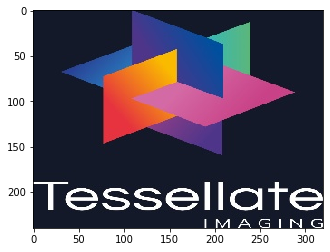

In [33]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1); # read the image
print("Input image shape - {}".format(img.shape));
plt.imshow(img[:,:,::-1]);
plt.show();

In [34]:
# STEP - 1 - Downscaling width

height, width, channels = img.shape;

# create blank image of half the width
resized_img_width = np.zeros((height, width//2, channels), dtype=np.int32);                              


Width resized image shape - (240, 160, 3)


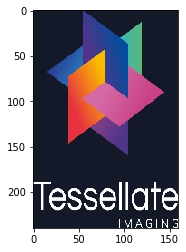

In [35]:
# Merge columns by ommitting half the columns
for r in range(height):
    for c in range(width//2):
        resized_img_width[r][c] += (img[r][2*c]);
        
print("Width resized image shape - {}".format(resized_img_width.shape));
plt.imshow(resized_img_width[:,:,::-1]);
plt.show();

In [36]:
# In the above image look at the scales not the actual image shape

In [37]:
# STEP - 2 - Downscaling width

# create blank image of half the height 
resized_img = np.zeros((height//2, width//2, channels), dtype=np.int32); 

Complete resized image shape - (120, 160, 3)


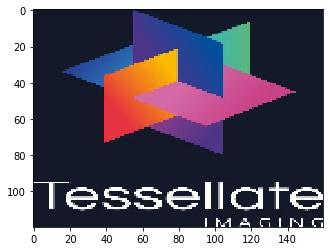

In [38]:
# Merge rows by ommitting half the rows
for r in range(height//2):
    for c in range(width//2):
        resized_img[r][c] += (resized_img_width[r*2][c]);
print("Complete resized image shape - {}".format(resized_img.shape));
plt.imshow(resized_img[:,:,::-1]);
plt.show();  

# concentrate on how the edges get distorted

In [39]:
# STEP - 3 - Upscaling height

# create blank image of height as original image and  
half_upsclaled_img = np.zeros((height, width//2, channels), dtype=np.int32); 

Height upscaled image shape - (240, 160, 3)


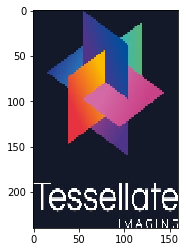

In [40]:
# Expand rows by replicating every consecutive row
half_upsclaled_img[0:height:2, :, :] = resized_img[:, :, :];
half_upsclaled_img[1:height:2, :, :] = resized_img[:, :, :];
print("Height upscaled image shape - {}".format(half_upsclaled_img.shape));
plt.imshow(half_upsclaled_img[:,:,::-1]);
plt.show(); 

In [41]:
# STEP - 3 - Upscaling width

# create blank image of height as original image and  
upsclaled_img = np.zeros((height, width, channels), dtype=np.int32); 

Fully upscaled image shape - (240, 320, 3)


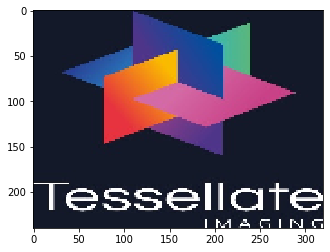

In [42]:
# Expand rows by replicating every consecutive row
upsclaled_img[:, 0:width:2, :] = half_upsclaled_img[:, :, :];
upsclaled_img[:, 1:width:2, :] = half_upsclaled_img[:, :, :];
print("Fully upscaled image shape - {}".format(upsclaled_img.shape));
upscaled_img_manual = upsclaled_img;
plt.imshow(upsclaled_img[:,:,::-1]);
plt.show(); 

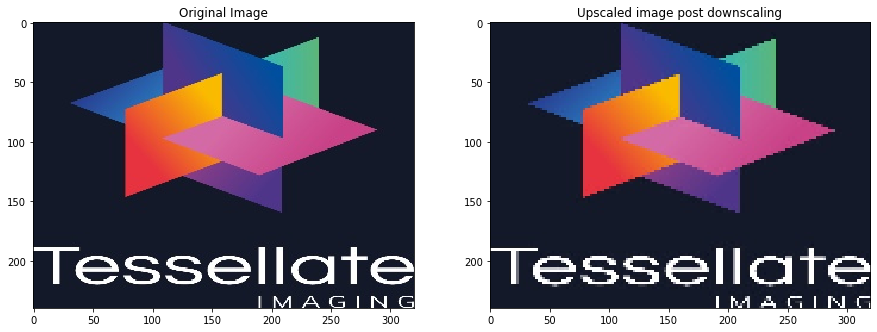

In [43]:
# Step - 5 - Comparing original and upscaled
f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Original Image');
plt.imshow(img[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Upscaled image post downscaling');
plt.imshow(upsclaled_img[:, :, ::-1])
plt.show()

In [ ]:
## There is a lot of information loss in this sort of image resizing

### Image resizing using OpenCV
        - Downscaling shape by using cv2.resize() option
        - Upscaling shape by using cv2.resize() option

Input image shape - (240, 320, 3)


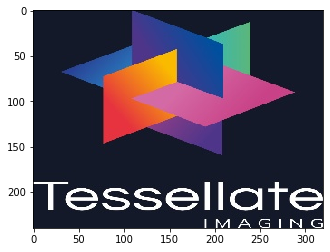

In [44]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1); # read the image
print("Input image shape - {}".format(img.shape));
plt.imshow(img[:,:,::-1]);
plt.show();

Downscaled image shape - (120, 160, 3)


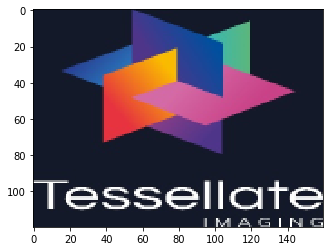

In [45]:
# STEP - 1 - Downscaling image to half its width and height
# cv2.resize


height, width, channels = img.shape;

# create blank image of half the width
resized_img = cv2.resize(img, (width//2, height//2)); 
print("Downscaled image shape - {}".format(resized_img.shape));
plt.imshow(resized_img[:,:,::-1]);
plt.show(); 

Upscaled image shape - (240, 320, 3)


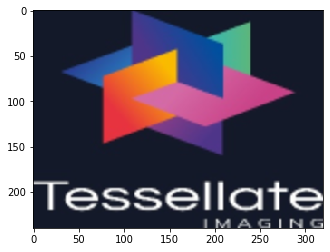

In [46]:
# STEP - 2 - Upscaling image to its original width and height
# cv2.resize

height, width, channels = img.shape;

# create blank image of half the width
upscaled_img = cv2.resize(resized_img, (width, height)); 
print("Upscaled image shape - {}".format(upscaled_img.shape));
upscaled_img_opencv = upscaled_img;
plt.imshow(upscaled_img[:,:,::-1]);
plt.show(); 

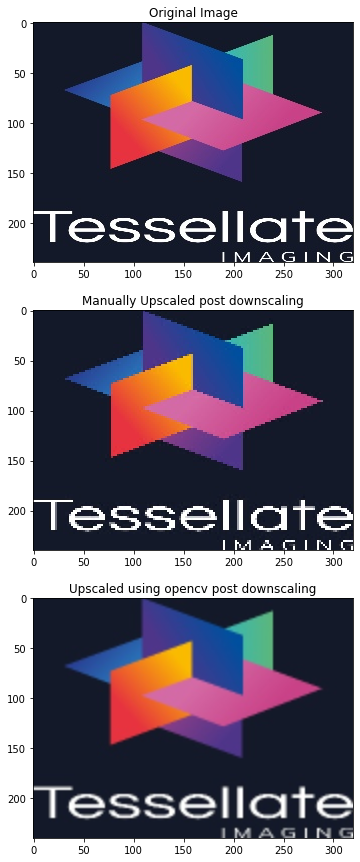

In [47]:
# Comparing original, manually upscaled, rescaled using opencv
# Step - 5 - Comparing original and upscaled
f = plt.figure(figsize=(15,15))
f.add_subplot(3, 1, 1).set_title('Original Image');
plt.imshow(img[:, :, ::-1])
f.add_subplot(3, 1, 2).set_title('Manually Upscaled post downscaling');
plt.imshow(upscaled_img_manual[:, :, ::-1])
f.add_subplot(3, 1, 3).set_title('Upscaled using opencv post downscaling');
plt.imshow(upscaled_img[:, :, ::-1])
plt.show()

In [48]:
# Interactive Demo - 1.
# Resizing and visualizing

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

sl1 = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1);
sl2 = widgets.FloatSlider(value=1.0, min=0.1, max=2.0, step=0.1);



def f(height_control, width_control):
    img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1);
    
    ###############################FOCUS###################################
    h, w, c = img.shape;
    print("Original shape = {}".format(img.shape));
    img = cv2.resize(img, (int(w*width_control), int(h*height_control)))
    print("Resized shape = {}".format(img.shape));
    #######################################################################

    plt.imshow(img[:,:,::-1])
    plt.show()

interact(f, height_control=sl1, width_control=sl2);

interactive(children=(FloatSlider(value=1.0, description='height_control', max=2.0, min=0.1), FloatSlider(valu…

## Visualize data loss in continuous downscaling and upscaling

In [5]:
# Interactive Demo - 2.
# Effect of multiple downscaling and upscaling over the same image: Data loss visualization

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import cv2 
from matplotlib import pyplot as plt

sl = widgets.SelectionSlider(options=[0, 10, 25, 50, 75, 100], value= 0);

def f(times):
    img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1);
    
    
    ###############################FOCUS###################################
    h, w, c = img.shape;
    for i in range(times):
        img = cv2.resize(img, (w//4, h//4));
        img = cv2.resize(img, (w, h));
    ########################################################################    
        
        
    
    plt.figure(figsize = (8,8))
    plt.imshow(img[:,:,::-1])
    plt.show()

interact(f, times=sl);

interactive(children=(SelectionSlider(description='times', options=(0, 10, 25, 50, 75, 100), value=0), Output(…

### Image resizing using Pillow
        - Downscaling shape by using Pillow
        - Upscaling shape by using Pillow

Input image shape - (320, 240)


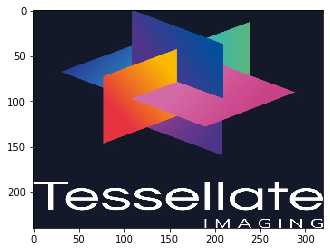

In [50]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open(folder_path + "imgs/chapter4/tessellate.jpg"); # read the image
print("Input image shape - {}".format(img_p.size));
plt.imshow(img_p);
plt.show();

Downscaled image shape - (160, 120)


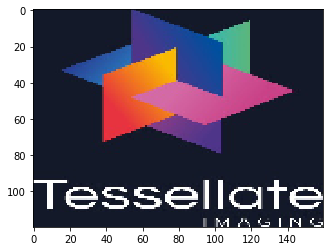

In [51]:
# STEP - 1 - Downscaling image to half its width and height
# Image.resize

width, height = img_p.size;

# create blank image of half the width
resized_img = img_p.resize((width//2, height//2)); 
print("Downscaled image shape - {}".format(resized_img.size));
plt.imshow(resized_img);
plt.show(); 

Upscaled image shape - (320, 240)


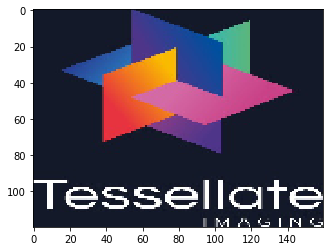

In [52]:
# STEP - 2 - Upscaling image to its original width and height

width, height = img_p.size;

# create blank image of half the width
upscaled_img = resized_img.resize((width, height)); 
print("Upscaled image shape - {}".format(upscaled_img.size));
plt.imshow(resized_img);
plt.show(); 

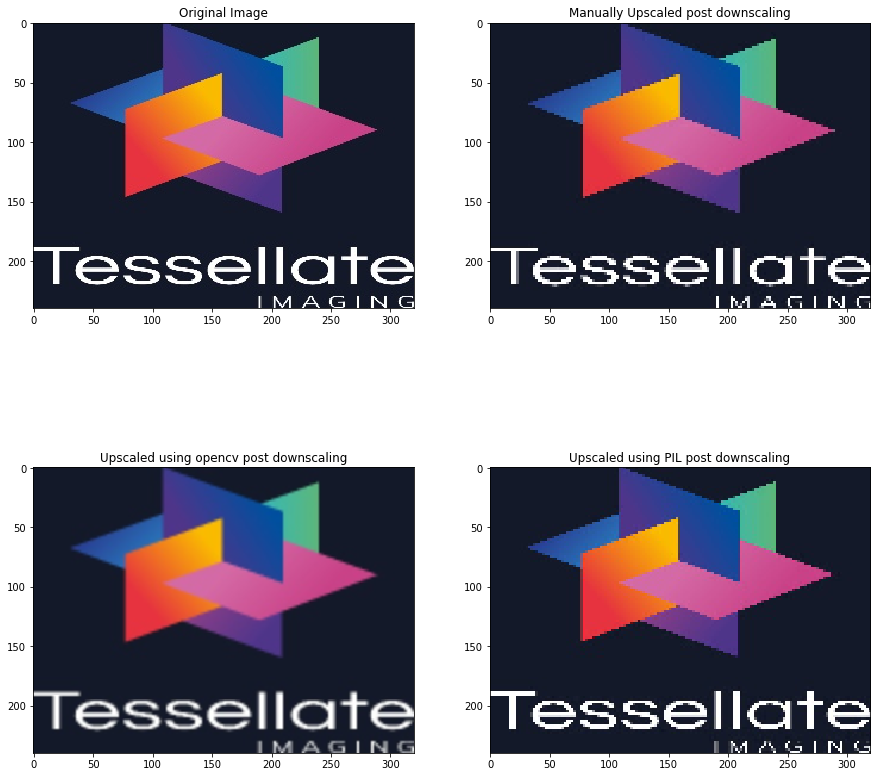

In [53]:
# Comparing original, manually upscaled, rescaled using opencv
# Step - 5 - Comparing original and upscaled
f = plt.figure(figsize=(15,15))
f.add_subplot(2, 2, 1).set_title('Original Image');
plt.imshow(img[:, :, ::-1])
f.add_subplot(2, 2, 2).set_title('Manually Upscaled post downscaling');
plt.imshow(upscaled_img_manual[:, :, ::-1])
f.add_subplot(2, 2, 3).set_title('Upscaled using opencv post downscaling');
plt.imshow(upscaled_img_opencv[:, :, ::-1])
f.add_subplot(2, 2, 4).set_title('Upscaled using PIL post downscaling');
plt.imshow(upscaled_img)
plt.show()

### Algorithms for scaling

In [55]:
print("Use slider to change slides")
# Slide section 3
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=4, min=4, max=11);

def f(slide_num):
    img_name = folder_path + "imgs/chapter4/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=4, description='slide_num', max=11, min=4), Output()), _dom_classes=('wi…

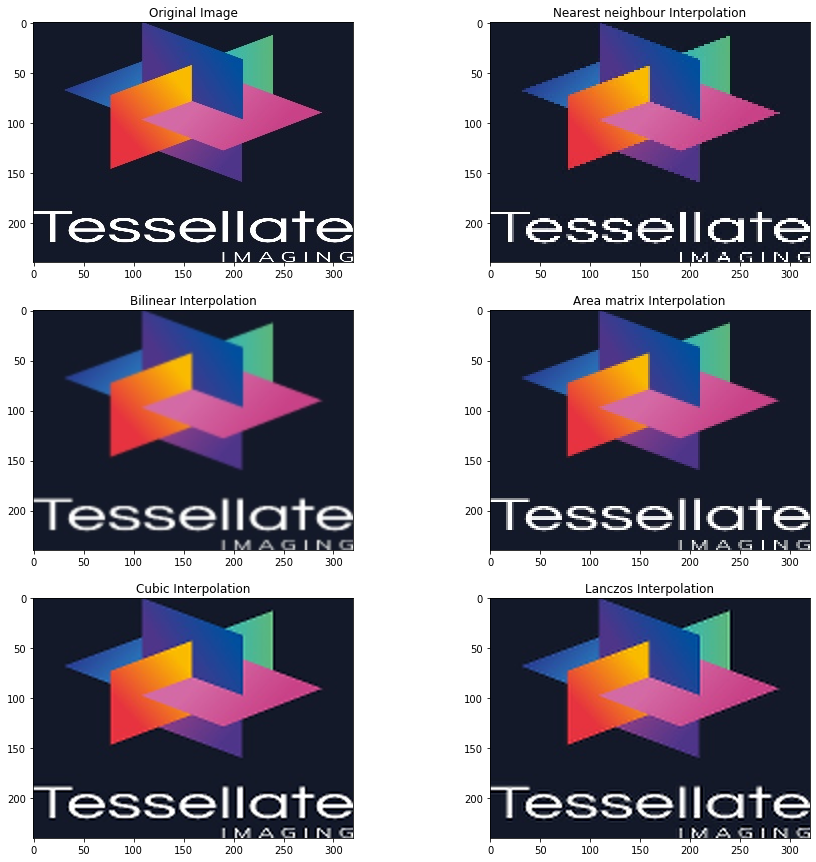

In [56]:
# OpenCV algorithms

import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1); # read the image
h, w, c = img.shape;

# Downscaling and upscaling using nearest neighbor interpolation
img_n = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_NEAREST);
img_n = cv2.resize(img_n, (w, h), interpolation = cv2.INTER_NEAREST);

# Downscaling and upscaling using Bilinear interpolation
img_b = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_LINEAR);
img_b = cv2.resize(img_b, (w, h), interpolation = cv2.INTER_LINEAR);

# Downscaling and upscaling using matrix area interpolation
img_a = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_AREA);
img_a = cv2.resize(img_a, (w, h), interpolation = cv2.INTER_AREA);

# Downscaling and upscaling using cubic interpolation
img_c = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_CUBIC);
img_c = cv2.resize(img_c, (w, h), interpolation = cv2.INTER_CUBIC);


# Downscaling and upscaling using lanczos interpolation
img_l = cv2.resize(img, (w//2, h//2), interpolation = cv2.INTER_LANCZOS4);
img_l = cv2.resize(img_l, (w, h), interpolation = cv2.INTER_LANCZOS4);


f = plt.figure(figsize=(15,15))
f.add_subplot(3, 2, 1).set_title('Original Image');
plt.imshow(img[:, :, ::-1])
f.add_subplot(3, 2, 2).set_title('Nearest neighbour Interpolation');
plt.imshow(img_n[:, :, ::-1])
f.add_subplot(3, 2, 3).set_title('Bilinear Interpolation');
plt.imshow(img_b[:, :, ::-1])
f.add_subplot(3, 2, 4).set_title('Area matrix Interpolation');
plt.imshow(img_a[:, :, ::-1])
f.add_subplot(3, 2, 5).set_title('Cubic Interpolation');
plt.imshow(img_c[:, :, ::-1])
f.add_subplot(3, 2, 6).set_title('Lanczos Interpolation');
plt.imshow(img_l[:, :, ::-1])
plt.show()


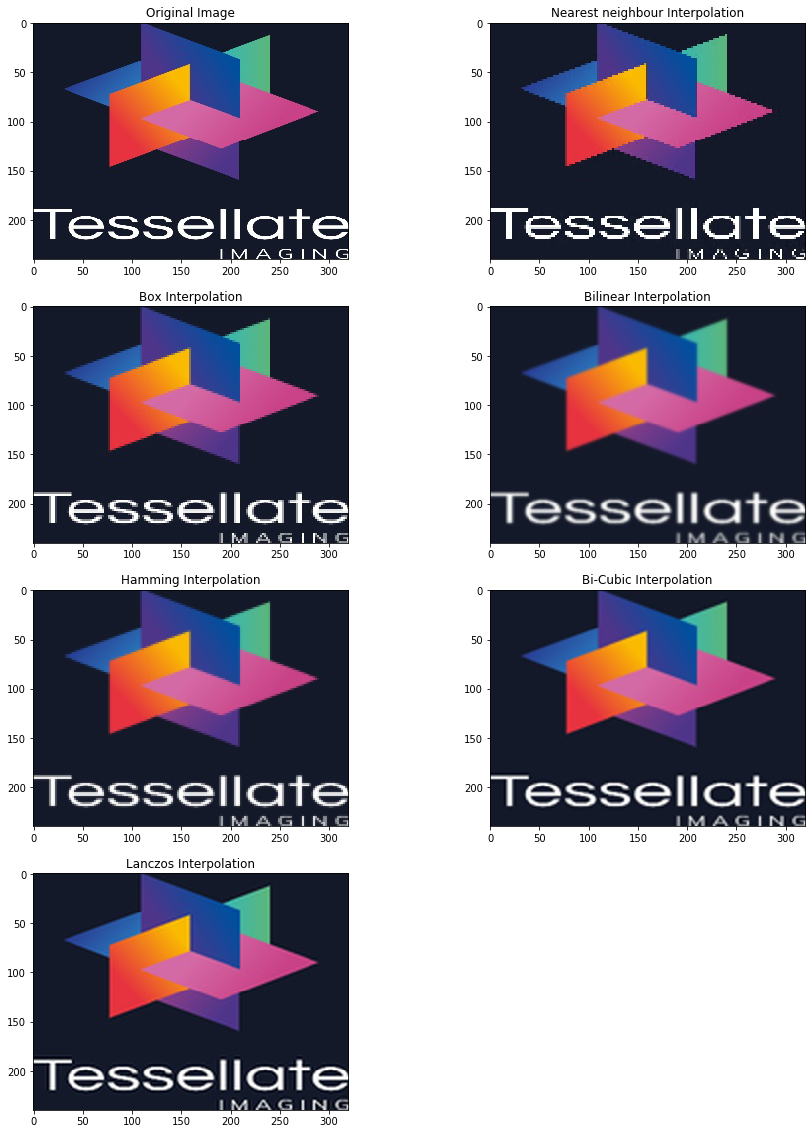

In [57]:
# Pillow algorithms
import PIL
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open(folder_path + "imgs/chapter4/tessellate.jpg"); # read the image
width, height = img_p.size;


# Downscaling and upscaling using nearest neighbor interpolation
img_n = img_p.resize((width//2, height//2), resample=PIL.Image.NEAREST); 
img_n = img_n.resize((width, height), resample=PIL.Image.NEAREST)

# Downscaling and upscaling using nearest box filtering
img_f = img_p.resize((width//2, height//2), resample=PIL.Image.BOX); 
img_f = img_f.resize((width, height), resample=PIL.Image.BOX)


# Downscaling and upscaling using nearest Bilinear interpolation
img_b = img_p.resize((width//2, height//2), resample=PIL.Image.BILINEAR); 
img_b = img_b.resize((width, height), resample=PIL.Image.BILINEAR)


# Downscaling and upscaling using nearest Hamming interpolation
img_h = img_p.resize((width//2, height//2), resample=PIL.Image.HAMMING); 
img_h = img_h.resize((width, height), resample=PIL.Image.HAMMING)


# Downscaling and upscaling using nearest Bicubic interpolation
img_c = img_p.resize((width//2, height//2), resample=PIL.Image.BICUBIC); 
img_c = img_c.resize((width, height), resample=PIL.Image.BICUBIC)


# Downscaling and upscaling using nearest Lanczos interpolation
img_l = img_p.resize((width//2, height//2), resample=PIL.Image.LANCZOS); 
img_l = img_l.resize((width, height), resample=PIL.Image.LANCZOS)



f = plt.figure(figsize=(15,20))
f.add_subplot(4, 2, 1).set_title('Original Image');
plt.imshow(img_p)
f.add_subplot(4, 2, 2).set_title('Nearest neighbour Interpolation');
plt.imshow(img_n)
f.add_subplot(4, 2, 3).set_title('Box Interpolation');
plt.imshow(img_f)
f.add_subplot(4, 2, 4).set_title('Bilinear Interpolation');
plt.imshow(img_b)
f.add_subplot(4, 2, 5).set_title('Hamming Interpolation');
plt.imshow(img_h)
f.add_subplot(4, 2, 6).set_title('Bi-Cubic Interpolation');
plt.imshow(img_c)
f.add_subplot(4, 2, 7).set_title('Lanczos Interpolation');
plt.imshow(img_l)
plt.show()

In [ ]:
###################################################################################################################

<a id='2'></a>
# Translation

In [58]:
print("Use slider to change slides")
# Slide section 4
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=12, min=12, max=12);

def f(slide_num):
    img_name = folder_path + "imgs/chapter4/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=12, description='slide_num', max=12, min=12), Output()), _dom_classes=('…

### Image translation using basic numpy

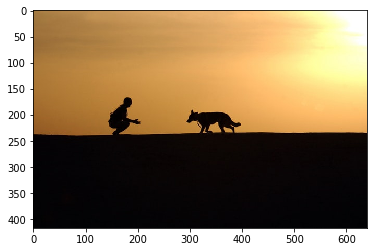

In [59]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread("imgs/chapter4/dog.jpg", -1);
plt.imshow(img[:,:,::-1]);
plt.show();

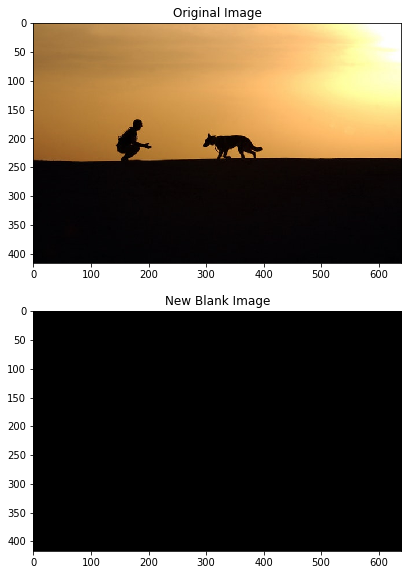

In [60]:
# Translating to right by 50 pixels
h, w, c = img.shape;
img_new = np.zeros((h, w, c), dtype=np.uint8);

f = plt.figure(figsize=(15,15))
f.add_subplot(3, 1, 1).set_title('Original Image');
plt.imshow(img[:, :, ::-1])
f.add_subplot(3, 1, 2).set_title('New Blank Image');
plt.imshow(img_new[:, :, ::-1])
plt.show()

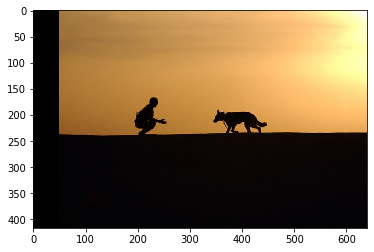

In [61]:
img_new[:, 50:, :] = img[:, :w-50, :];

plt.imshow(img_new[:,:,::-1]);
plt.show();

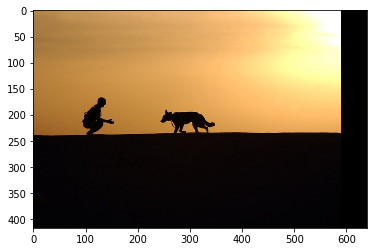

In [62]:
# Translating to left by 50 pixels
h, w, c = img.shape;
img_new = np.zeros((h, w, c), dtype=np.uint8);

img_new[:, :w-50, :] = img[:, 50:, :];
plt.imshow(img_new[:,:,::-1]);
plt.show();

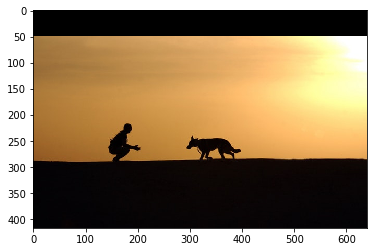

In [63]:
# Translating down by 50 pixels
h, w, c = img.shape;
img_new = np.zeros((h, w, c), dtype=np.uint8);

img_new[50:, :, :] = img[:h-50, :, :];
plt.imshow(img_new[:,:,::-1]);
plt.show();

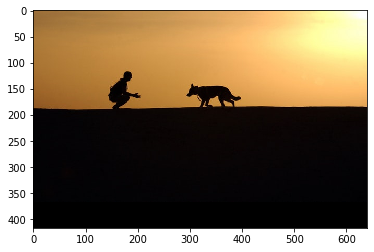

In [64]:
# Translating up by 50 pixels
h, w, c = img.shape;
img_new = np.zeros((h, w, c), dtype=np.uint8);

img_new[:h-50, :, :] = img[50:, :, :];
plt.imshow(img_new[:,:,::-1]);
plt.show();

In [66]:
# Interactive Demo - 3.
# Translating image in both +x and -x directions

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

lst = [x for x in range(-110, 100, 10)];
sl = widgets.SelectionSlider(options=lst, value= 0);

def f(left_right):
    img = cv2.imread(folder_path + "imgs/chapter4/dog.jpg", -1);
    h, w, c = img.shape;
    img_new = np.zeros((h, w, c), dtype=np.uint8);
    print(left_right);
    if(left_right < 0):
        img_new[:, :w-abs(left_right), :] = img[:, abs(left_right):, :];
    else:
        img_new[:, left_right:, :] = img[:, :w-left_right, :];
        
    plt.figure(figsize = (8,8))
    plt.imshow(img_new[:,:,::-1])
    plt.show()

interact(f, left_right=sl);

interactive(children=(SelectionSlider(description='left_right', index=11, options=(-110, -100, -90, -80, -70, …

In [ ]:
# Interactive Demo - 4.
# Translating image in both +y and -y directions

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

lst = [x for x in range(-100, 110, 10)];
sl = widgets.SelectionSlider(options=lst, value= 0, orientation='vertical');

def f(up_down):
    img = cv2.imread(folder_path + "imgs/chapter4/dog.jpg", -1);
    h, w, c = img.shape;
    img_new = np.zeros((h, w, c), dtype=np.uint8);
    
    if(up_down > 0):
        img_new[:h-abs(up_down), :, :] = img[abs(up_down):, :, :];
    else:
        img_new[abs(up_down):, :, :] = img[:h-abs(up_down), :, :];
    
    
    plt.figure(figsize = (8,8))
    plt.imshow(img_new[:,:,::-1])
    plt.show()

interact(f, up_down=sl);

### Quiz - 1
 - Which interpolation should be used for Zooming in the photo?

<a id='3'></a>
# Rotation

In [70]:
print("Use slider to change slides")
# Slide section 4
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=13, min=13, max=13);

def f(slide_num):
    img_name = folder_path + "imgs/chapter4/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=13, description='slide_num', max=13, min=13), Output()), _dom_classes=('…

Check different affine transforms from : https://en.wikipedia.org/wiki/Affine_transformation

### Image rotation using PIL

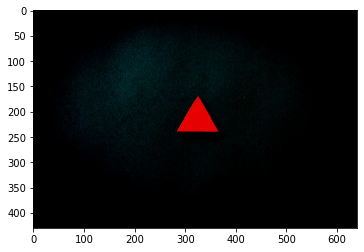

In [71]:
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt
img_p = Image.open(folder_path + "imgs/chapter4/triangle.jpg");
plt.imshow(img_p);
plt.show();

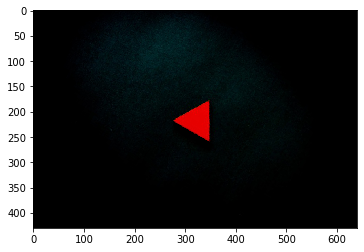

In [72]:
# Clockwise rotation by 30 degrees with pivot as the center
# Image.rotate()

img_p_new = img_p.rotate(-30);
plt.imshow(img_p_new);
plt.show();

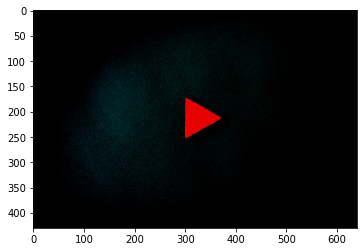

In [73]:
# Anti-Clockwise rotation by 30 degrees with pivot as the center

img_p_new = img_p.rotate(30);
plt.imshow(img_p_new);
plt.show();

In [74]:
# Interactive Demo - 5.
# Image translation using PIL's rotate function

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import PIL

lst = [x for x in range(-100, 110, 10)];
sl1 = widgets.SelectionSlider(options=lst, value= 0);
sl2 = widgets.SelectionSlider(options=lst, value= 0);


def f(left_right, up_down):
    img_p = Image.open(folder_path + "imgs/chapter4/triangle.jpg");
    
    img_p_new = img_p.rotate(0, translate=(left_right, up_down))
        
    plt.figure(figsize = (8,8))
    plt.imshow(img_p_new)
    plt.show()

interact(f, left_right=sl1, up_down=sl2);

interactive(children=(SelectionSlider(description='left_right', index=10, options=(-100, -90, -80, -70, -60, -…

## Image Rotation

In [8]:
# Interactive Demo - 6.
# Understanding other arguments of PIL Image rotate function

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import PIL
from PIL import Image, ImageDraw

lst = [x for x in range(-90, 100, 30)];
sl1 = widgets.SelectionSlider(options=lst, value= 0);
lst2 = [PIL.Image.NEAREST, PIL.Image.BILINEAR, PIL.Image.BICUBIC]
sl2 = widgets.SelectionSlider(options=lst2, value= PIL.Image.NEAREST);
sl3 = widgets.SelectionSlider(options=[True, False], value= False);
lst3 = [0, 20, 100, 200];
sl4 = widgets.SelectionSlider(options=lst3, value= 0);
sl5 = widgets.SelectionSlider(options=lst3, value= 0);

def f(angle, resample, expand, center_x, center_y):
    img_p = Image.open(folder_path + "imgs/chapter4/tessellate.jpg");
    
    if(center_x == 0 or center_y == 0):
        cx = None;
    else:
        cx = (center_x, center_y); 
    img_p_new = img_p.rotate(-angle, resample=resample, expand=expand, center=cx);
    draw = ImageDraw.Draw(img_p_new)
    if(center_x != 0 and center_y != 0):
        draw.ellipse((center_x-5, center_y-5, center_x+5, center_y+5), fill=(255, 255, 255))
    
    plt.figure(figsize = (8,8))
    plt.imshow(img_p_new)
    plt.show()

interact(f, angle=sl1, resample=sl2, expand=sl3, center_x=sl4, center_y=sl5);


interactive(children=(SelectionSlider(description='angle', index=3, options=(-90, -60, -30, 0, 30, 60, 90), va…

<a id='4'></a>
# Affine Transformation

In [76]:
print("Use slider to change slides")
# Slide section 5
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=14, min=14, max=14);

def f(slide_num):
    img_name = folder_path + "imgs/chapter4/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=14, description='slide_num', max=14, min=14), Output()), _dom_classes=('…

### Affine Transformation using OpenCV

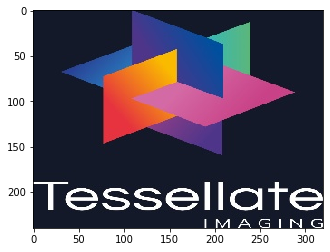

In [77]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1);
plt.imshow(img[:,:,::-1]);
plt.show();

In [80]:
# Type 1 -> Keeping two points static and changing 


img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1);
rows,cols,ch = img.shape


# Read as x, y
pts1 = np.float32([[50,50],[200,50], [50,200]])
pts2 = np.float32([[80,50],[200,50], [50,200]])


cv2.circle(img,(int(pts1[0][0]), int(pts1[0][1])), 5, (0,255,0), -1);
cv2.circle(img,(int(pts1[1][0]), int(pts1[1][1])), 5, (0,0,255), -1);
cv2.circle(img,(int(pts1[2][0]), int(pts1[2][1])), 5, (255,0,0), -1);

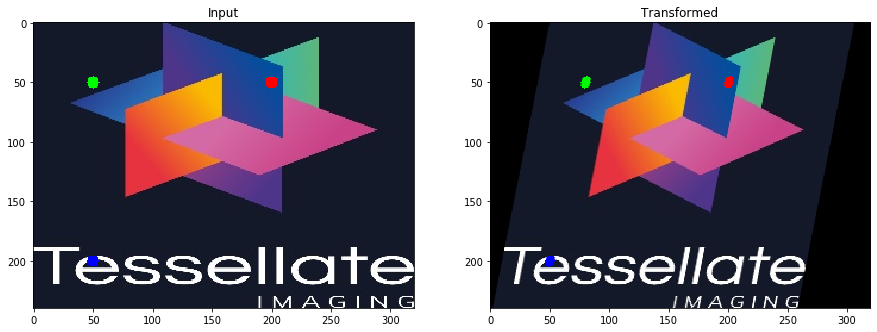

In [81]:
#cv2.getAffineTranform
#cv2.warpAffine

M = cv2.getAffineTransform(pts1,pts2)
dst = cv2.warpAffine(img,M,(cols,rows))

f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Input');
plt.imshow(img[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Transformed');
plt.imshow(dst[:, :, ::-1])
plt.show()

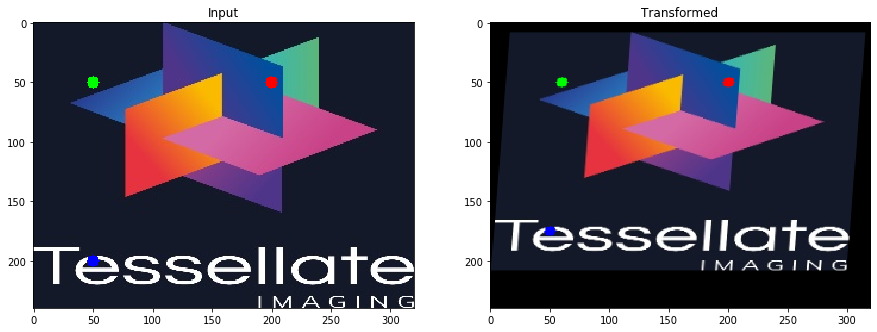

In [82]:
# Type 3 -> Keeping 1 point as hinge


img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1);
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50], [50,200]])
#pts2 = np.float32([[60,50],[190,50], [50,200]]) # Works as translation + shrinking
pts2 = np.float32([[60,50],[200,50], [50,175]])


cv2.circle(img,(int(pts1[0][0]), int(pts1[0][1])), 5, (0,255,0), -1)
cv2.circle(img,(int(pts1[1][0]), int(pts1[1][1])), 5, (0,0,255), -1)
cv2.circle(img,(int(pts1[2][0]), int(pts1[2][1])), 5, (255,0,0), -1)

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Input');
plt.imshow(img[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Transformed');
plt.imshow(dst[:, :, ::-1])
plt.show()

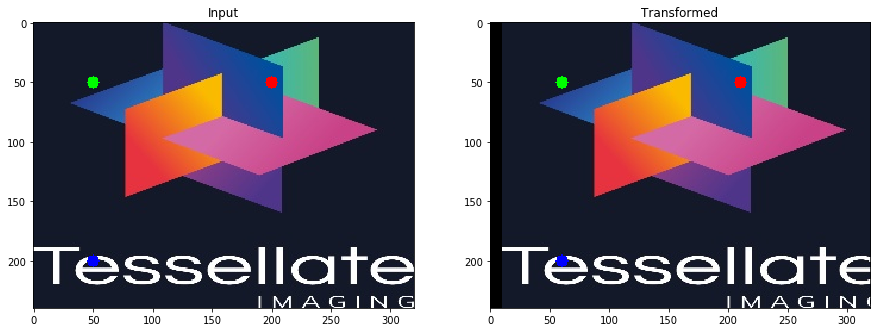

In [84]:
# Type 3 -> Translating all three points -> translation


img = cv2.imread(folder_path + "imgs/chapter4/tessellate.jpg", -1);
rows,cols,ch = img.shape

pts1 = np.float32([[50,50],[200,50], [50,200]])
pts2 = np.float32([[60,50],[210,50], [60,200]])


cv2.circle(img,(int(pts1[0][0]), int(pts1[0][1])), 5, (0,255,0), -1)
cv2.circle(img,(int(pts1[1][0]), int(pts1[1][1])), 5, (0,0,255), -1)
cv2.circle(img,(int(pts1[2][0]), int(pts1[2][1])), 5, (255,0,0), -1)

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(img,M,(cols,rows))

f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Input');
plt.imshow(img[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Transformed');
plt.imshow(dst[:, :, ::-1])
plt.show()

<a id='5'></a>
# Perspective Transform

In [85]:
print("Use slider to change slides")
# Slide section 6
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from IPython.display import display
from PIL import Image


sl = widgets.IntSlider(value=15, min=15, max=15);

def f(slide_num):
    img_name = folder_path + "imgs/chapter4/slide{}.jpg".format(slide_num);
    img = Image.open(img_name);
    
    display(img);

interact(f, slide_num=sl);

Use slider to change slides


interactive(children=(IntSlider(value=15, description='slide_num', max=15, min=15), Output()), _dom_classes=('…

## Perspective transform using OpenCV

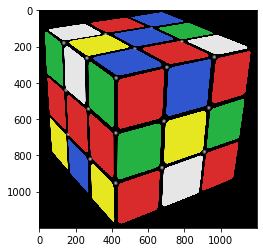

In [2]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
img = cv2.imread(folder_path + "imgs/chapter4/cube.png", 1);
plt.imshow(img[:,:,::-1]);
plt.show();

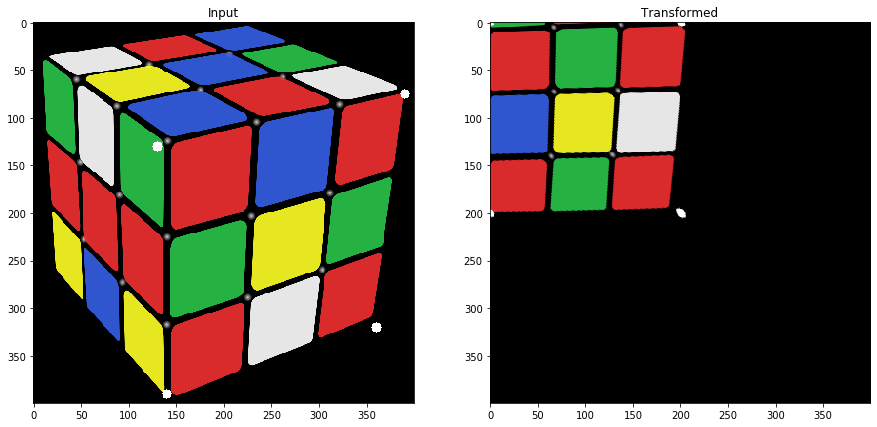

In [3]:
# Type 1 -> Zooming in from a view


img = cv2.imread(folder_path + "imgs/chapter4/cube.png", 1);
img = cv2.resize(img, (400, 400));
rows,cols,ch = img.shape

# Counter clock wise
pts1 = np.float32([[130,130], [390,75], [360,320], [140, 390],  ])
pts2 = np.float32([[0,0], [0, 200], [200,200], [200,0]])


# uncomment each and see
cv2.circle(img,(int(pts1[0][0]), int(pts1[0][1])), 5, (255,255,255), -1)
cv2.circle(img,(int(pts1[1][0]), int(pts1[1][1])), 5, (255,255,255), -1)
cv2.circle(img,(int(pts1[2][0]), int(pts1[2][1])), 5, (255,255,255), -1)
cv2.circle(img,(int(pts1[3][0]), int(pts1[3][1])), 5, (255,255,255), -1)

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(cols,rows))

f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Input');
plt.imshow(img[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Transformed');
plt.imshow(dst[:, :, ::-1])
plt.show()

## DIY CODING

<a id='6'></a>
# Coding Assignment - Get the right perspective transform
    - Taken an image cube.png, it's perspective transformed image is dst_perspective.jpg
    - Apply transform in such a way that dst_perspective is receieved as output
       - Choose the right pts mapping

### Quiz - 2
- Code to get desired output


In [ ]:
# Goal 
# To view from left hand sie of the image
img1 = cv2.imread(folder_path + "imgs/chapter4/cube.png", 1);
img2 = cv2.imread(folder_path + "imgs/chapter4/dst_perspective.jpg", 1);


f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Input');
plt.imshow(img1[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Transformed');
plt.imshow(img2[:, :, ::-1])
plt.show()

In [ ]:
# Type 1 -> Zooming in from a view

img = cv2.imread(folder_path + "imgs/chapter4/cube.png", 1);
img = cv2.resize(img, (400, 400));
rows,cols,ch = img.shape


# Find correct points to getright image
# Write code here by updating the values for the variable pts1
pts1 = 

pts2 = np.float32([[0,0], [0,200], [200,200], [200, 0]])


# uncomment each and see
cv2.circle(img,(int(pts1[0][0]), int(pts1[0][1])), 5, (255,255,255), -1)
cv2.circle(img,(int(pts1[1][0]), int(pts1[1][1])), 5, (255,255,255), -1)
cv2.circle(img,(int(pts1[2][0]), int(pts1[2][1])), 5, (255,255,255), -1)
cv2.circle(img,(int(pts1[3][0]), int(pts1[3][1])), 5, (255,255,255), -1)

M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(img,M,(cols,rows))

f = plt.figure(figsize=(15,15))
f.add_subplot(1, 2, 1).set_title('Input');
plt.imshow(img[:, :, ::-1])
f.add_subplot(1, 2, 2).set_title('Transformed');
plt.imshow(dst[:, :, ::-1])
plt.show()